!pip install scipy

!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
pd.options.display.max_colwidth = 18
pd.options.display.max_columns = 50

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [5]:
pd.set_option('display.max_rows',100)

In [69]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


Не знаю могут ли быть 3008 дублей обоснованными.

In [7]:
#df = df.drop_duplicates()

In [70]:
for elem in df.columns:
  print(df[elem].value_counts())
  print(f'\n-------------')

satisfaction_level
0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.78    241
0.37    241
0.82    241
0.89    237
0.83    234
0.76    234
0.72    230
0.50    229
0.66    228
0.75    226
0.87    225
0.91    224
0.43    224
0.80    222
0.81    220
0.90    220
0.59    219
0.79    217
0.44    211
0.57    210
0.40    209
0.63    209
0.49    209
0.69    209
0.61    208
0.85    207
0.70    205
0.45    203
0.96    203
0.86    200
0.65    199
0.92    198
0.52    196
0.09    195
0.60    193
0.38    189
0.62    188
0.51    187
0.88    187
0.64    187
0.56    187
0.54    185
0.98    183
0.58    182
0.95    181
0.55    179
0.53    179
0.67    177
0.97    176
0.39    175
0.99    172
0.71    171
0.41    171
0.93    169
0.94    167
0.68    162
0.42    155
0.48    149
0.36    139
1.00    111
0.46     95
0.24     80
0.16     79
0.15     76
0.19     74
0.14     73
0.17     72
0.20     69
0.21     67
0.18     63
0.22     60
0.31     59
0.23     54
0.13     54
0.32     50
0.34     

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Корреляция

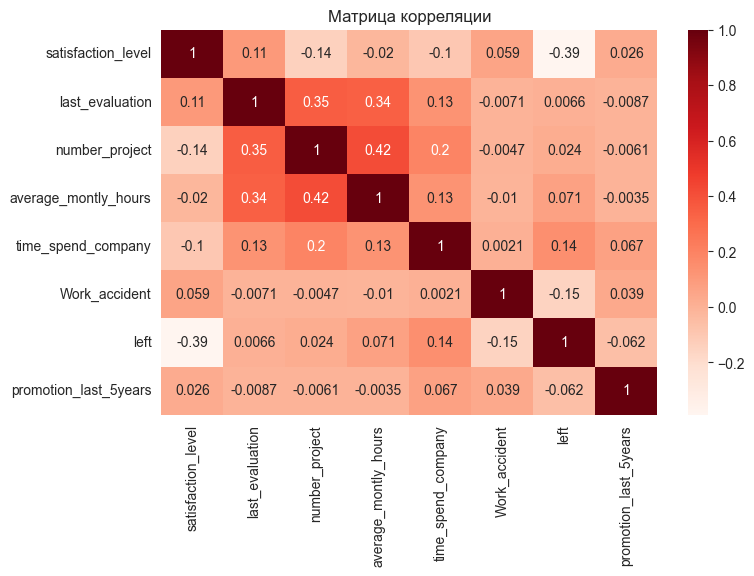

In [73]:
corr_matrix = df[df.columns[:-2]].corr('pearson')
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title("Матрица корреляции")
plt.show()

In [13]:
np.fill_diagonal(corr_matrix.values, np.nan)
np.nanmax(np.abs(corr_matrix.values))

0.41721063440177986

In [14]:
np.nanmin(np.abs(corr_matrix.values))

0.0021204180967097077


**Два самых зависимых признака:**

*   average_montly_hours и number_project

Видна интересная обратная зависимость переменных:

*   left и satisfaction_level

**Два самых независимых признака:**

*   Work_accident и time_spend_company




# Расчет сотруников по департаменту

In [15]:
df.groupby('department').count().satisfaction_level

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

#Распределение по зарплатам

Text(0.5, 1.0, 'Salary distribution')

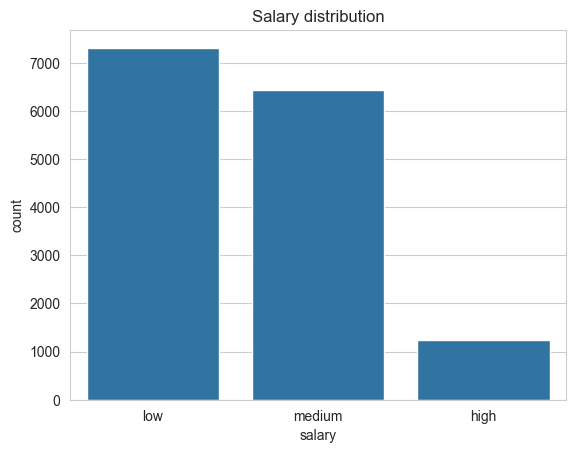

In [16]:
sns.countplot(x = df.salary)
plt.title('Salary distribution')

# В разрезе департамента

In [75]:
dep = df['department'].value_counts()
for name,elem in dep.items():
  print(name,f'-',elem)

sales - 4140
technical - 2720
support - 2229
IT - 1227
product_mng - 902
marketing - 858
RandD - 787
accounting - 767
hr - 739
management - 630


/var/folders/xv/zrplmy153n904sqktkc05fd40000gn/T/ipykernel_16083/1732345361.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=10)


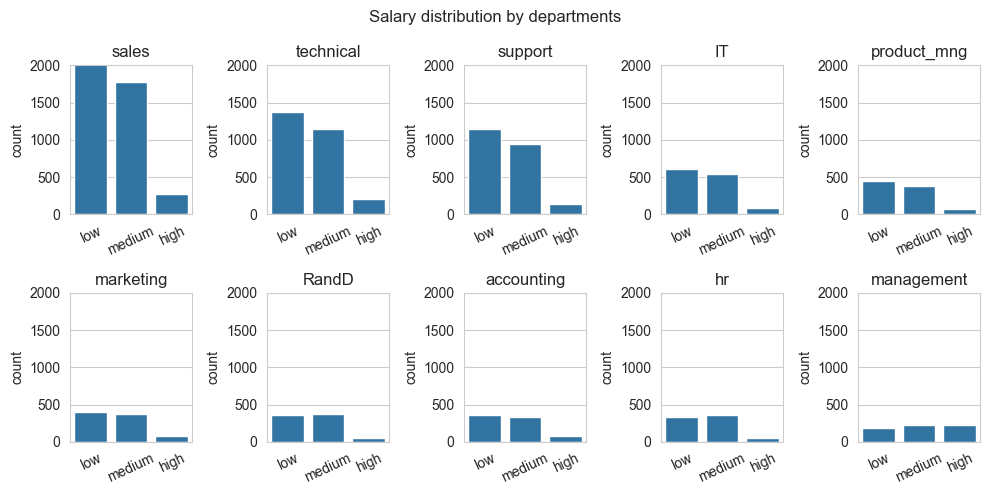

In [18]:

fig, axs = plt.subplots(2, 5, figsize=(10,5))

# Now axs is a 2D array of Axes objects
for idx,(name,value) in enumerate(dep.items()):
  if idx < 5:
    sns.countplot(x=df[df['department']==name].salary, ax = axs[0,idx], order=['low','medium','high'])
    ax = axs[0,idx].set_title(name)
  else:
    sns.countplot(x=df[df['department']==name].salary, ax = axs[1,idx-5],order=['low','medium','high'])
    ax = axs[1,idx-5].set_title(name)

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=10)
    ax.set_ylim([0,2000])
    ax.set_xlabel('')
    ax.set_xlabel('')

plt.suptitle('Salary distribution by departments')
fig.tight_layout()
plt.show()


In [19]:
len(df)

14999

# Првоеряем гипотезу

сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким окладом

In [20]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
high = df[df.salary == 'high']['average_montly_hours'].values
low = df[df.salary == 'low']['average_montly_hours'].values

Так как эксперимент не строгий, и изменчивость нашего признака не велика (данные грубо говоря статичны). Расчет объема выборки не имеет смысла, но я бы хотел его рассчитать, чтобы понимать примерный р азряд необходимых данных, ведь переизбыток данных ведет к непрактичности теста. Но я пока не могу понять как это сделать)

In [22]:
len(high), len(low)

(1237, 7316)

In [23]:
print(f'{high.mean()} and {np.median(high)}')
print(f'{low.mean()} and {np.median(low)}')

199.86742118027485 and 199.0
200.9965828321487 and 199.0


<Axes: ylabel='Density'>

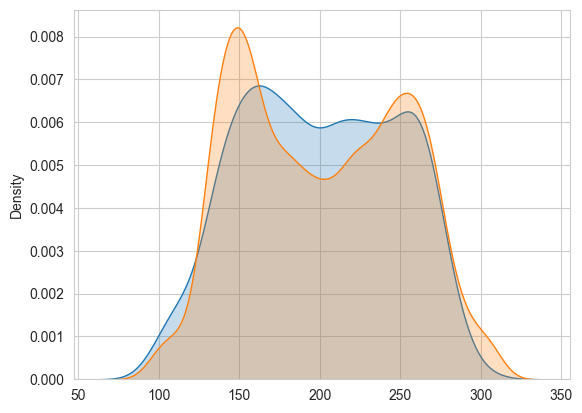

In [24]:
sns.kdeplot(high, fill=True)
sns.kdeplot(low, fill=True)

Чтож, сильно видно, что распределения не нормальные, убедимся в этом с помощью критерия шапиро.

In [25]:
stat,p = st.shapiro(high)
if p < 0.05:
  print(f'p-value = {p} - Отвергаем нулевую гипотезу, о том что распределение не отличается от нормального')
else:
  print(f'p - value = {p} - Нулевую гипотезу отвергнуть не можем, распределение скорее всего не отличается от нормального')

p-value = 5.6027314672963646e-15 - Отвергаем нулевую гипотезу, о том что распределение не отличается от нормального


In [26]:
stat,p = st.shapiro(low)
if p < 0.05:
  print(f'p-value = {p} - Отвергаем нулевую гипотезу, о том что распределение не отличается от нормального')
else:
  print(f'p - value = {p} - Нулевую гипотезу отвергнуть не можем, распределение скорее всего не отличается от нормального')

p-value = 6.987004491004302e-41 - Отвергаем нулевую гипотезу, о том что распределение не отличается от нормального


/var/folders/xv/zrplmy153n904sqktkc05fd40000gn/T/ipykernel_16083/1823930878.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  stat,p = st.shapiro(low)


В таком случае мы либо приводим распредление к нормальному, либо используем непарамтрическией критерий. Необходимости проверять равенство дисперсий отсутствует, так как непараметрические критерии нечувствительны к выбросам и разности дисперсий.

In [27]:
stat,p = st.mannwhitneyu(high,low)
if p < 0.05:
  print(f'p-value={p:.10f} - Отвергаем нулевую гипотезу, средние наших выборок вероятней всего отличаются')
else:
  print(f'p-value={p:.10f} - Не можем отвергнуть нулевую гипотезу, средние наших выборок вероятней всего не отличаются')

p-value=0.8241330721 - Не можем отвергнуть нулевую гипотезу, средние наших выборок вероятней всего не отличаются


# Расчет показателей

In [29]:
lft = df[df.left==1]
notlft = df[df.left==0]

In [30]:
lft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
prom_lft=np.round(len(lft[lft.promotion_last_5years == 1])/len(lft),4)
prom_lft

0.0053

In [32]:
prom_notlft=np.round(len(notlft[notlft.promotion_last_5years == 1])/len(notlft),4)
prom_notlft

0.0263

In [33]:
stsf_lft = lft.satisfaction_level.mean()
stsf_lft

0.4400980117614114

In [34]:
stsf_notlft = notlft.satisfaction_level.mean()
stsf_notlft

0.666809590479524

In [35]:
proj_lft = np.round(lft.number_project.mean(),4)
proj_lft

3.8555

In [36]:
proj_notlft = np.round(notlft.number_project.mean(),4)
proj_notlft

3.7867

# Обучение LDA
Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

In [37]:
import sklearn

Убираем категориальные данные и мультиколлинеарность

In [38]:
dff = df.drop(columns=['department','salary','last_evaluation', 'number_project'])

In [39]:
dff.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,157,3,0,1,0
1,0.80,262,6,0,1,0
2,0.11,272,4,0,1,0
3,0.72,223,5,0,1,0
4,0.37,159,3,0,1,0


In [40]:
dff.groupby('left').agg('mean').round(2)

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,
0,0.67,199.06,3.38,0.18,0.03
1,0.44,207.42,3.88,0.05,0.01


In [41]:
data_class = dff.left

In [42]:
data_class.value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [43]:
! pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [46]:
X_train, X_test, y_train, y_test = train_test_split(dff.drop('left', axis=1), data_class, test_size=0.25)

In [47]:
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Пробую избавиться от дисбаланаса таким методом, практически не разобравшись как он работает

oversampler = RandomOverSampler(sampling_strategy='auto')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [48]:
len(y_test)

3750

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
lda = LinearDiscriminantAnalysis()

In [51]:
lda.fit(X_train_resampled, y_train_resampled)

LinearDiscriminantAnalysis()

In [52]:
pred = lda.predict(X_test)

In [53]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
y_test = y_test.values

In [55]:
res = pd.DataFrame([y_test,pred]).T

In [56]:
res.columns = ['y','pred']

In [57]:
pd.set_option('display.max_rows',100)

In [58]:
res

,y,pred
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
3745,0,0
3746,1,1
3747,0,1
3748,0,0


In [59]:
res.sub = (res.pred - res.y)**2

In [60]:
res.sub.sum()

977

In [61]:
from sklearn.metrics import accuracy_score

Но у нас очень сильный дисбаланс классов, поэтому не пойдет 

In [62]:
accuracy_score(y_test,pred)

0.7394666666666667

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [64]:
f1_score(y_test, pred)

0.5819426615318785

In [65]:
recall_score(y_test, pred)

0.7555555555555555

In [66]:
precision_score(y_test,pred)

0.4732080723729993

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, pred)

array([[2093,  757],
       [ 220,  680]])